<a href="https://www.kaggle.com/code/fall2fire/liver-disease-prediction?scriptVersionId=277293636" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  Getting into Data...
## 1.Importing libaries
## 2.Exploring the data *EDA* and preprocessing data
## 3.Finding some crucial patterns in data 
## 4.Classification Modeling
## 5.Evaluation of Model

In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
df=pd.read_csv('/kaggle/input/indian-liver-disease-dataset/indian_liver_disease_dataset_for_training.csv')

In [3]:
df.head()

,Patient_ID,Age,Gender,Occupation,BMI,Obesity_Class,Diet_Quality,Physical_Activity,Sleep_Hours,Smoking_Status,...,Comorb_Hypertension,Comorb_Genetic_History,ALT,AST,Bilirubin,Albumin,Platelets,Alk_Phosphatase,Liver_Function_Test,Liver_Disease_Type
0,P5557,25,Female,Retired,21.8,Normal,Healthy,Moderate,7.7,Never,...,No,No,87.20,89.87,0.90,4.64,293,90.0,Severely Abnormal,Hepatitis_B
1,P1571,75,Male,Housewife,24.6,Normal,Average,High,7.2,Former,...,No,No,44.00,22.09,0.41,3.84,269,99.0,Slightly Abnormal,Fatty_Liver
2,P2583,47,Male,Farmer,22.8,Normal,Average,High,8.9,Never,...,No,Family History Present,67.50,29.60,0.56,4.19,392,102.0,Abnormal,Fatty_Liver
3,P4949,42,Male,Business,19.2,Normal,Healthy,Low,6.5,Former,...,No,No,57.34,67.38,1.40,4.30,268,91.0,Severely Abnormal,Alcoholic_Liver_Disease
4,P7090,18,Female,Student,21.8,Normal,Healthy,Low,6.2,Former,...,No,No,31.14,61.39,3.54,3.97,257,119.0,Severely Abnormal,Cirrhosis


In [4]:
df.isnull().sum()

Patient_ID                   0
Age                          0
Gender                       0
Occupation                   0
BMI                          0
Obesity_Class                0
Diet_Quality                 0
Physical_Activity            0
Sleep_Hours                  0
Smoking_Status               0
Alcohol_Consumption       5213
Sym_Fatigue                  0
Sym_Jaundice                 0
Sym_Abdominal_Pain           0
Sym_Itching                  0
Sym_Ascites                  0
Sym_Dark_Urine               0
Sym_Weight_Loss              0
Comorb_Diabetes              0
Comorb_Hypertension          0
Comorb_Genetic_History       0
ALT                          0
AST                          0
Bilirubin                    0
Albumin                      0
Platelets                    0
Alk_Phosphatase              0
Liver_Function_Test          0
Liver_Disease_Type           0
dtype: int64

In [5]:
df.describe()

,Age,BMI,Sleep_Hours,ALT,AST,Bilirubin,Albumin,Platelets,Alk_Phosphatase
count,11499.000000,11499.000000,11499.00000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000
mean,44.794417,26.034473,6.78272,41.615191,42.325477,1.189596,3.990724,256.525437,102.027028
std,14.610874,4.472933,1.20175,20.156696,22.216081,0.731217,0.501600,80.139604,17.974584
min,18.000000,15.000000,3.00000,10.000000,10.000000,0.300000,2.610000,21.000000,80.000000
25%,34.000000,23.000000,6.00000,26.980000,26.080000,0.680000,3.610000,194.000000,90.000000
50%,45.000000,26.000000,6.80000,37.650000,35.750000,0.990000,3.990000,258.000000,100.000000
75%,55.000000,29.100000,7.60000,52.020000,55.105000,1.400000,4.390000,322.000000,110.000000
max,85.000000,43.700000,10.00000,135.000000,126.000000,4.200000,5.000000,399.000000,214.200000


In [6]:
df['Liver_Disease_Type'].unique()

array(['Hepatitis_B', 'Fatty_Liver', 'Alcoholic_Liver_Disease',
       'Cirrhosis', 'Normal', 'Hepatitis_C', 'Liver_Cancer'], dtype=object)

In [7]:
df.dropna(inplace=True)

In [8]:
disease_count=df['Liver_Disease_Type'].value_counts()
disease_count

Liver_Disease_Type
Fatty_Liver                2213
Normal                     1744
Alcoholic_Liver_Disease     741
Cirrhosis                   620
Hepatitis_B                 457
Hepatitis_C                 303
Liver_Cancer                208
Name: count, dtype: int64

# -->EDA

<Axes: >

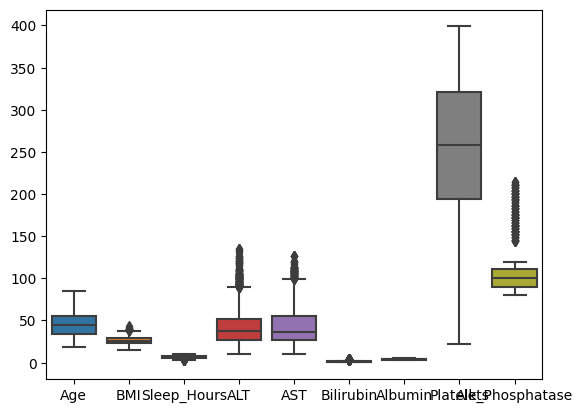

In [9]:
sns.boxplot(df)

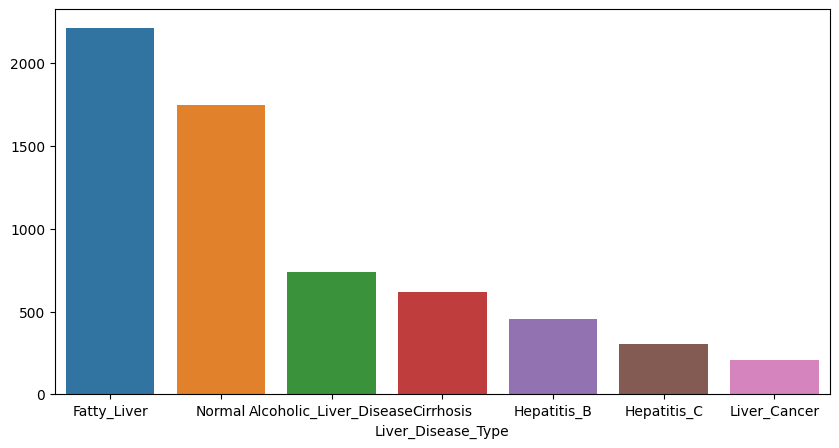

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x=disease_count.index, y=disease_count.values)
plt.show()

# Remark
### We can observe there is class imbalance problem in the target variable class i.e. *disease_count*


In [11]:
for i in df:
    print(df[i].value_counts())
    print("\n")

Patient_ID
P1571     1
P11320    1
P4656     1
P9644     1
P8399     1
         ..
P8387     1
P3146     1
P11342    1
P0813     1
P7271     1
Name: count, Length: 6286, dtype: int64


Age
18    285
40    178
48    168
47    166
45    166
     ... 
80     12
82     10
79      9
84      7
83      7
Name: count, Length: 68, dtype: int64


Gender
Male      3429
Female    2857
Name: count, dtype: int64


Occupation
Retired              820
Farmer               819
Laborer              783
Business             781
Healthcare Worker    780
Student              779
Office Worker        771
Housewife            753
Name: count, dtype: int64


BMI
26.0    75
26.2    70
27.0    67
25.2    63
27.5    63
        ..
38.2     1
40.2     1
37.6     1
38.5     1
15.9     1
Name: count, Length: 246, dtype: int64


Obesity_Class
Overweight     2507
Normal         2261
Obesity I      1073
Underweight     296
Obesity II      144
Obesity III       5
Name: count, dtype: int64


Diet_Quality
Average    3081


In [12]:
df.shape

(6286, 29)

In [13]:
df.drop(columns=['Patient_ID'],inplace=True)

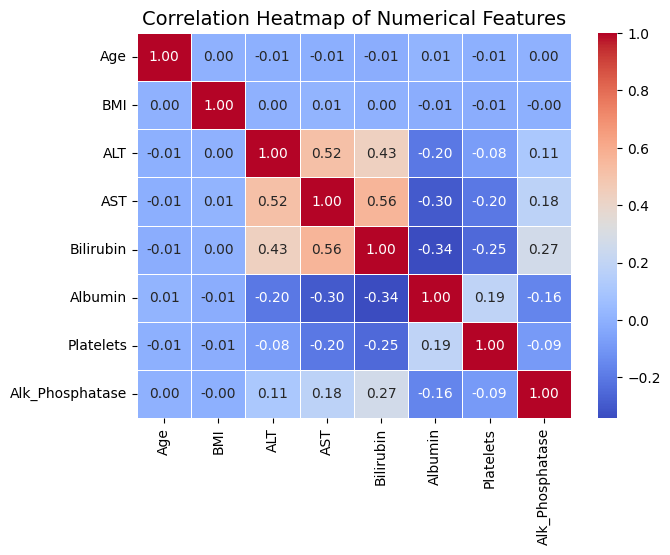

In [14]:
num_cols = [
    'Age', 'BMI', 'ALT', 'AST', 'Bilirubin', 
    'Albumin', 'Platelets', 'Alk_Phosphatase'
]
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

# Observation
### 'ALT', 'AST', 'Bilirubin' these classes are highly correalated....
### But still we can't judge it as there are still some columns which are not converted into numerical values...Upon converting them we can validate the data

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

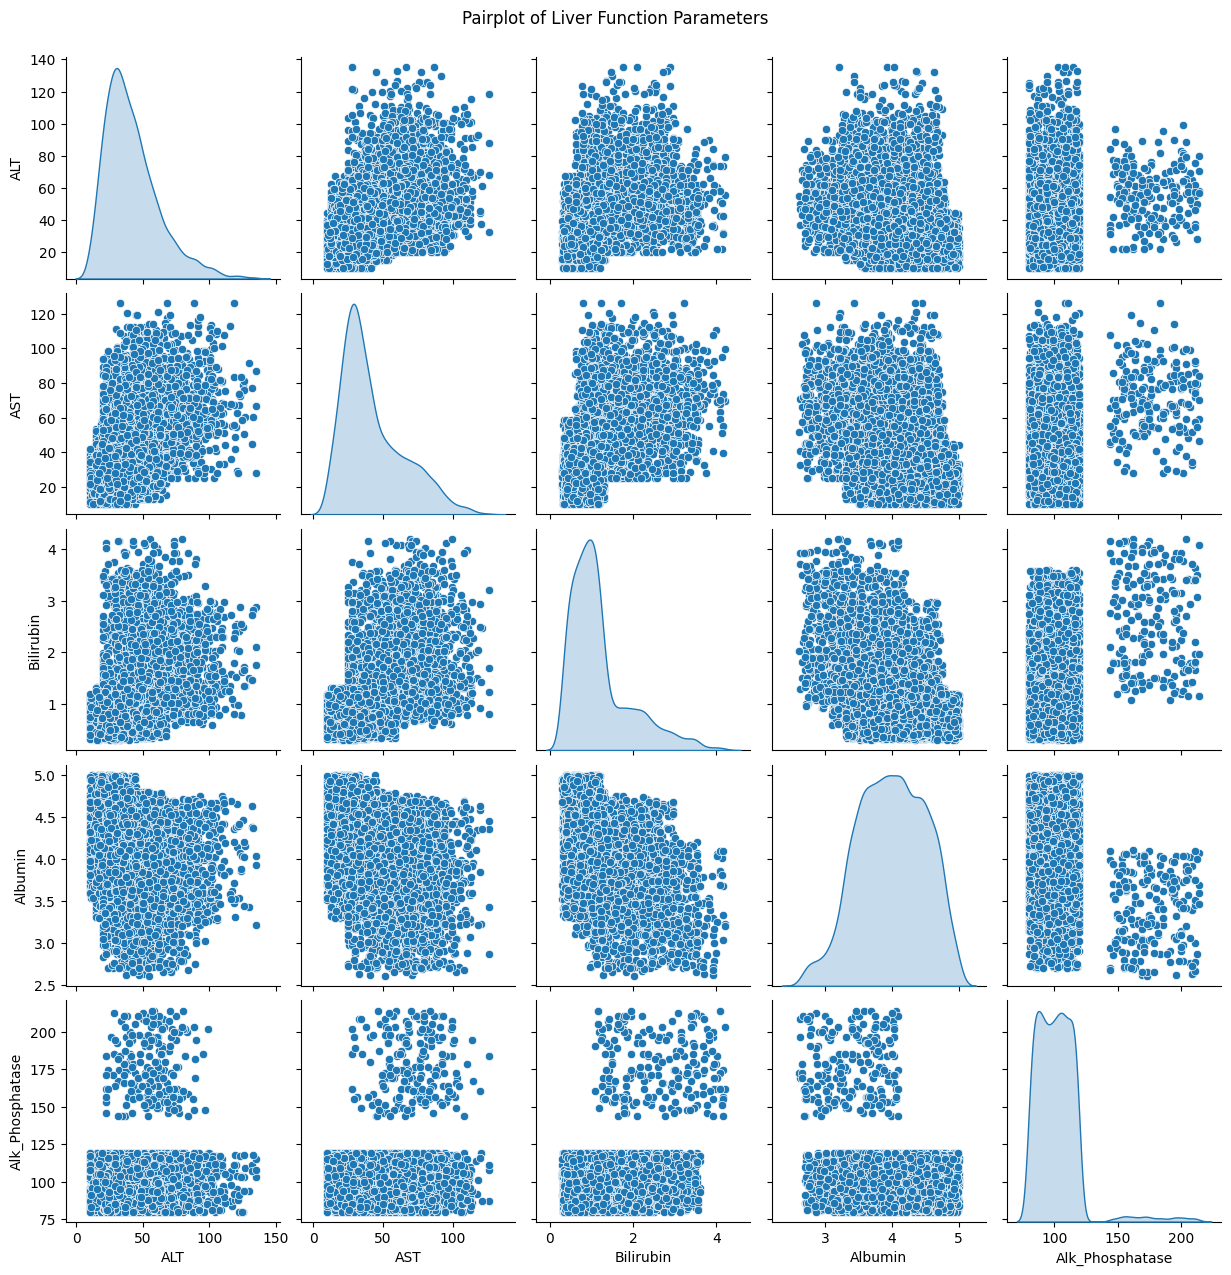

In [15]:
sns.pairplot(df[['ALT', 'AST', 'Bilirubin', 'Albumin', 'Alk_Phosphatase']], diag_kind='kde')
plt.suptitle("Pairplot of Liver Function Parameters", y=1.02)
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

#  Binary manual mapping
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Sym_Fatigue'] = df['Sym_Fatigue'].map({'No': 0, 'Yes (Tiredness)': 1})
df['Sym_Jaundice'] = df['Sym_Jaundice'].map({'No': 0, 'Yellow Eyes/Skin': 1})
df['Sym_Abdominal_Pain'] = df['Sym_Abdominal_Pain'].map({'No': 0, 'Yes (Abdominal Discomfort)': 1})
df['Sym_Itching'] = df['Sym_Itching'].map({'No': 0, 'Yes (Skin Itching)': 1})
df['Sym_Ascites'] = df['Sym_Ascites'].map({'No': 0, 'Fluid Accumulation': 1})
df['Sym_Dark_Urine'] = df['Sym_Dark_Urine'].map({'No': 0, 'Dark Urine': 1})
df['Sym_Weight_Loss'] = df['Sym_Weight_Loss'].map({'No': 0, 'Yes (Weight Loss)': 1})
df['Comorb_Diabetes'] = df['Comorb_Diabetes'].map({'No': 0, 'Yes (Diabetic)': 1})
df['Comorb_Hypertension'] = df['Comorb_Hypertension'].map({'No': 0, 'Yes (High BP)': 1})
df['Comorb_Genetic_History'] = df['Comorb_Genetic_History'].map({'No': 0, 'Family History Present': 1})

#  Ordinal features
df['Physical_Activity'] = df['Physical_Activity'].map({'Sedentary': 0, 'Low': 1, 'Moderate': 2, 'High': 3})
df['Liver_Function_Test'] = df['Liver_Function_Test'].map({
    'Normal': 0,
    'Slightly Abnormal': 1,
    'Abnormal': 2,
    'Severely Abnormal': 3
})
df['Obesity_Class'] = df['Obesity_Class'].map({
    'Underweight': 0,
    'Normal': 1,
    'Overweight': 2,
    'Obesity I': 3,
    'Obesity II': 4,
    'Obesity III': 5
})


#  One-hot encoding for nominal features
df = pd.get_dummies(df, columns=['Occupation', 'Diet_Quality', 'Smoking_Status', 'Alcohol_Consumption'], drop_first=True)
# Convert boolean dummy columns to int
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

#  Label encode target variable
le = LabelEncoder()
df['Liver_Disease_Type'] = le.fit_transform(df['Liver_Disease_Type'])


In [17]:
df.head(10)

,Age,Gender,BMI,Obesity_Class,Physical_Activity,Sleep_Hours,Sym_Fatigue,Sym_Jaundice,Sym_Abdominal_Pain,Sym_Itching,...,Occupation_Laborer,Occupation_Office Worker,Occupation_Retired,Occupation_Student,Diet_Quality_Healthy,Diet_Quality_Poor,Smoking_Status_Former,Smoking_Status_Never,Alcohol_Consumption_Low,Alcohol_Consumption_Moderate
1,75,0,24.6,1,3,7.2,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,47,0,22.8,1,3,8.9,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,42,0,19.2,1,1,6.5,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
4,18,1,21.8,1,1,6.2,1,0,0,1,...,0,0,0,1,1,0,1,0,1,0
5,52,0,26.5,2,2,4.3,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
10,54,1,24.0,1,1,7.1,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
11,62,0,30.9,3,1,7.6,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
12,55,1,27.9,2,1,7.4,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
13,22,0,28.5,2,1,6.9,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
16,18,0,23.4,1,3,7.6,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [18]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Obesity_Class', 'Physical_Activity',
       'Sleep_Hours', 'Sym_Fatigue', 'Sym_Jaundice', 'Sym_Abdominal_Pain',
       'Sym_Itching', 'Sym_Ascites', 'Sym_Dark_Urine', 'Sym_Weight_Loss',
       'Comorb_Diabetes', 'Comorb_Hypertension', 'Comorb_Genetic_History',
       'ALT', 'AST', 'Bilirubin', 'Albumin', 'Platelets', 'Alk_Phosphatase',
       'Liver_Function_Test', 'Liver_Disease_Type', 'Occupation_Farmer',
       'Occupation_Healthcare Worker', 'Occupation_Housewife',
       'Occupation_Laborer', 'Occupation_Office Worker', 'Occupation_Retired',
       'Occupation_Student', 'Diet_Quality_Healthy', 'Diet_Quality_Poor',
       'Smoking_Status_Former', 'Smoking_Status_Never',
       'Alcohol_Consumption_Low', 'Alcohol_Consumption_Moderate'],
      dtype='object')

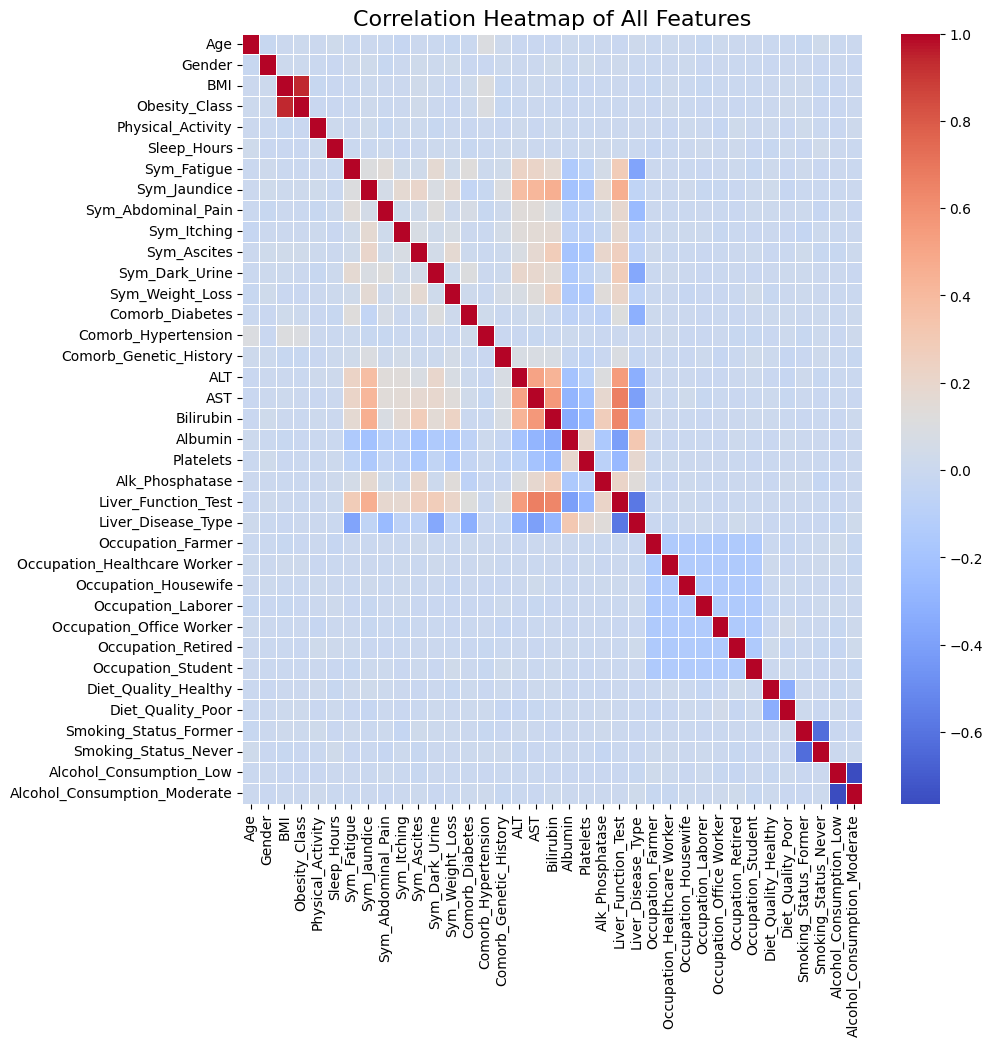

In [19]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(
    corr_matrix,
    annot=False,       # Set to True if you want numeric values inside cells
    cmap='coolwarm',   # Color palette
    linewidths=0.5,
    cbar=True
)
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.show()

# Observation
## 'Liver_Function_Test' 
#### is highly corelated with 'ALT', 'AST', 'Bilirubin'
#### Also 'Sym_Fatigue', 'Sym_Jaundice' are corelated to 'ALT', 'AST', 'Bilirubin'

In [20]:
target_corr = corr_matrix['Liver_Disease_Type'].sort_values(ascending=False)
print(target_corr)


Liver_Disease_Type              1.000000
Albumin                         0.317086
Platelets                       0.186389
Alk_Phosphatase                 0.136081
Occupation_Retired              0.023675
Alcohol_Consumption_Moderate    0.022782
Age                             0.014938
Occupation_Laborer              0.011091
Physical_Activity               0.006903
Occupation_Student              0.004770
Obesity_Class                   0.004270
Occupation_Housewife            0.002096
Gender                         -0.002714
Diet_Quality_Poor              -0.004800
Sleep_Hours                    -0.005386
Smoking_Status_Never           -0.006694
Diet_Quality_Healthy           -0.008720
BMI                            -0.009028
Occupation_Farmer              -0.009113
Smoking_Status_Former          -0.009502
Occupation_Office Worker       -0.010245
Comorb_Hypertension            -0.012610
Occupation_Healthcare Worker   -0.017804
Alcohol_Consumption_Low        -0.019676
Comorb_Genetic_H

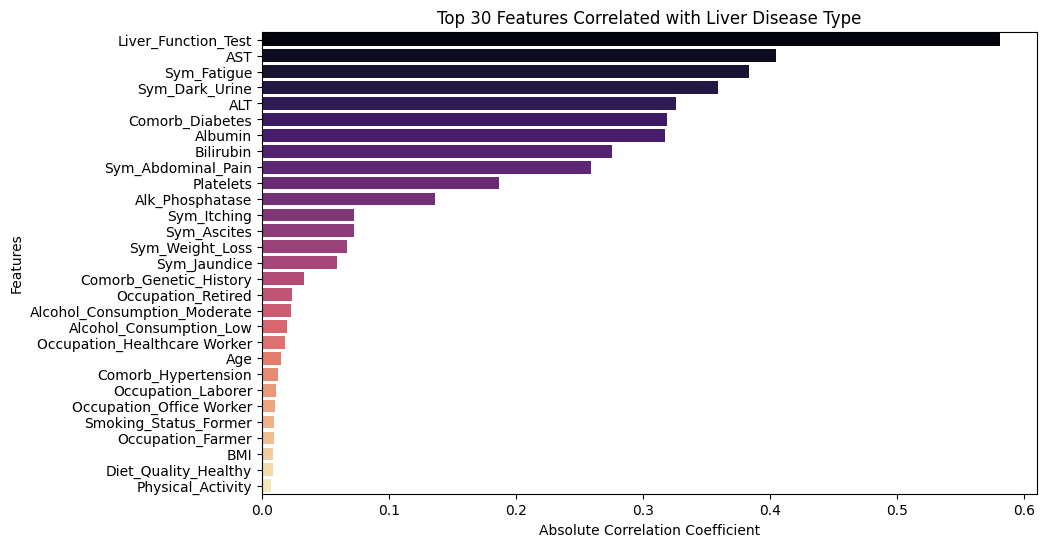

In [21]:
target_corr = df.corr()['Liver_Disease_Type'].abs().sort_values(ascending=False)[1:30]

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='magma')
plt.title('Top 30 Features Correlated with Liver Disease Type')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [22]:
# Select top 15 most correlated features with target
top_features = (
    df.corr()['Liver_Disease_Type']
    .abs()
    .sort_values(ascending=False)
    .index[1:16]   # skip the target 
)

print("Top correlated features:", list(top_features))

Top correlated features: ['Liver_Function_Test', 'AST', 'Sym_Fatigue', 'Sym_Dark_Urine', 'ALT', 'Comorb_Diabetes', 'Albumin', 'Bilirubin', 'Sym_Abdominal_Pain', 'Platelets', 'Alk_Phosphatase', 'Sym_Itching', 'Sym_Ascites', 'Sym_Weight_Loss', 'Sym_Jaundice']


# Test Train Splitting
# Classification Modeling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Features and target
X = df[top_features]
y = df['Liver_Disease_Type']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale numeric data (especially useful in SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8753180661577609

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       185
           1       0.88      0.91      0.90       155
           2       0.91      0.96      0.93       554
           3       0.65      0.61      0.63       114
           4       0.52      0.34      0.41        76
           5       1.00      1.00      1.00        52
           6       0.95      0.91      0.93       436

    accuracy                           0.88      1572
   macro avg       0.81      0.80      0.80      1572
weighted avg       0.87      0.88      0.87      1572



In [24]:
from xgboost import XGBClassifier

# Create XGBoost model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softmax',
    num_class=len(y.unique())
)

# Train
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8861323155216285

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       185
           1       0.93      0.92      0.93       155
           2       0.93      0.96      0.94       554
           3       0.65      0.64      0.65       114
           4       0.55      0.42      0.48        76
           5       1.00      1.00      1.00        52
           6       0.95      0.93      0.94       436

    accuracy                           0.89      1572
   macro avg       0.83      0.82      0.82      1572
weighted avg       0.88      0.89      0.88      1572



In [25]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05,
    num_leaves=50,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multiclass',
    num_class=len(y.unique()),
    random_state=42
)

# Train
lgbm_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lgb = lgbm_model.predict(X_test_scaled)

# Evaluate
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1318
[LightGBM] [Info] Number of data points in the train set: 4714, number of used features: 15
[LightGBM] [Info] Start training from score -2.137524
[LightGBM] [Info] Start training from score -2.316255
[LightGBM] [Info] Start training from score -1.044322
[LightGBM] [Info] Start training from score -2.620562
[LightGBM] [Info] Start training from score -3.033342
[LightGBM] [Info] Start training from score -3.408436
[LightGBM] [Info] Start training from score -1.282038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [26]:
# Print mapping of each encoded value to the original label
for idx, class_name in enumerate(le.classes_):
    print(f"{idx}: {class_name}")

0: Alcoholic_Liver_Disease
1: Cirrhosis
2: Fatty_Liver
3: Hepatitis_B
4: Hepatitis_C
5: Liver_Cancer
6: Normal


# Comparison of Models 
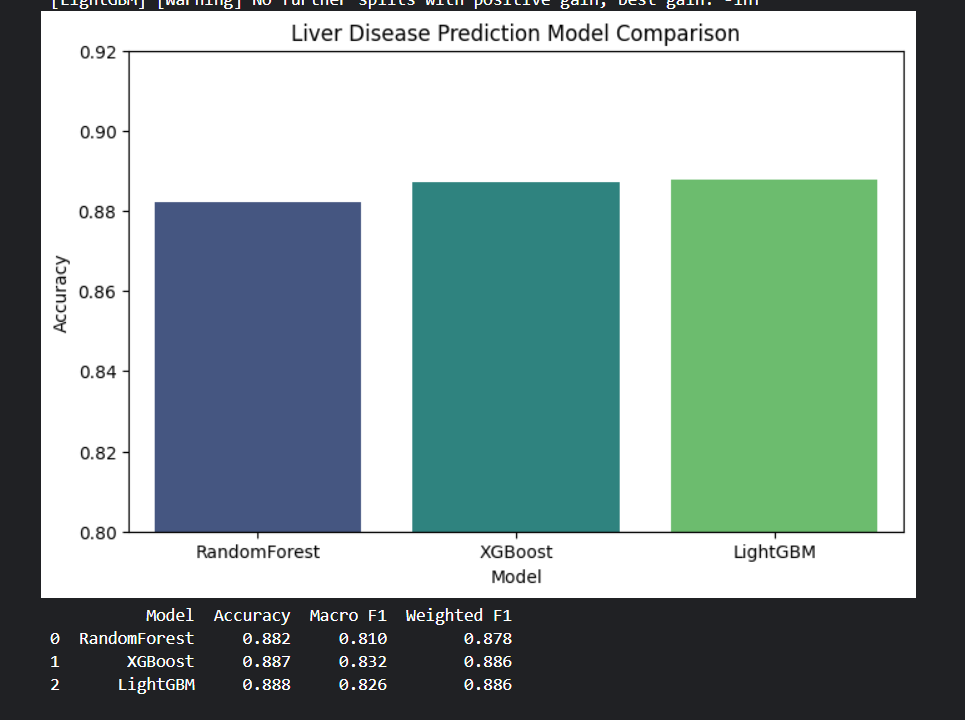
# LightGBM is fine out of all...
## As there is *Class Imbalance* problem in following:-
## 3: Hepatitis_B 4: Hepatitis_C  

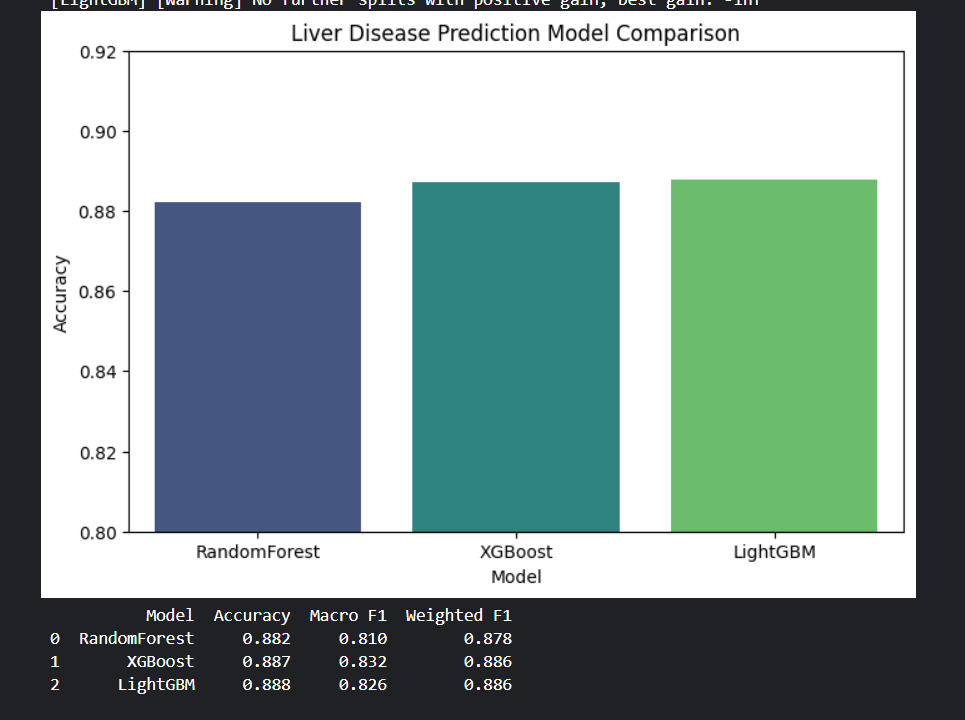
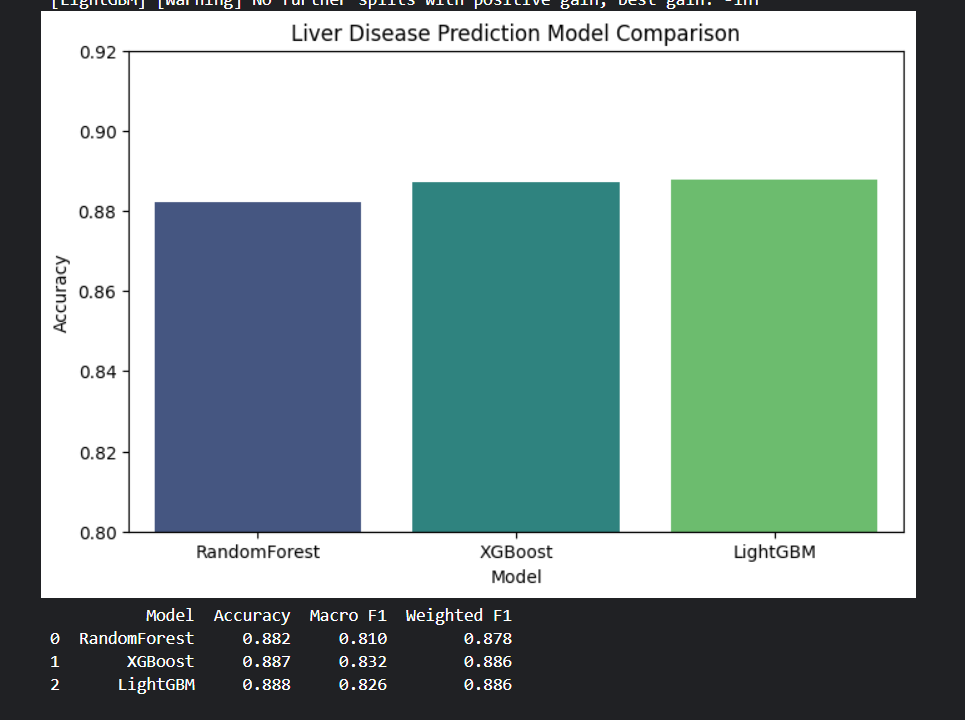
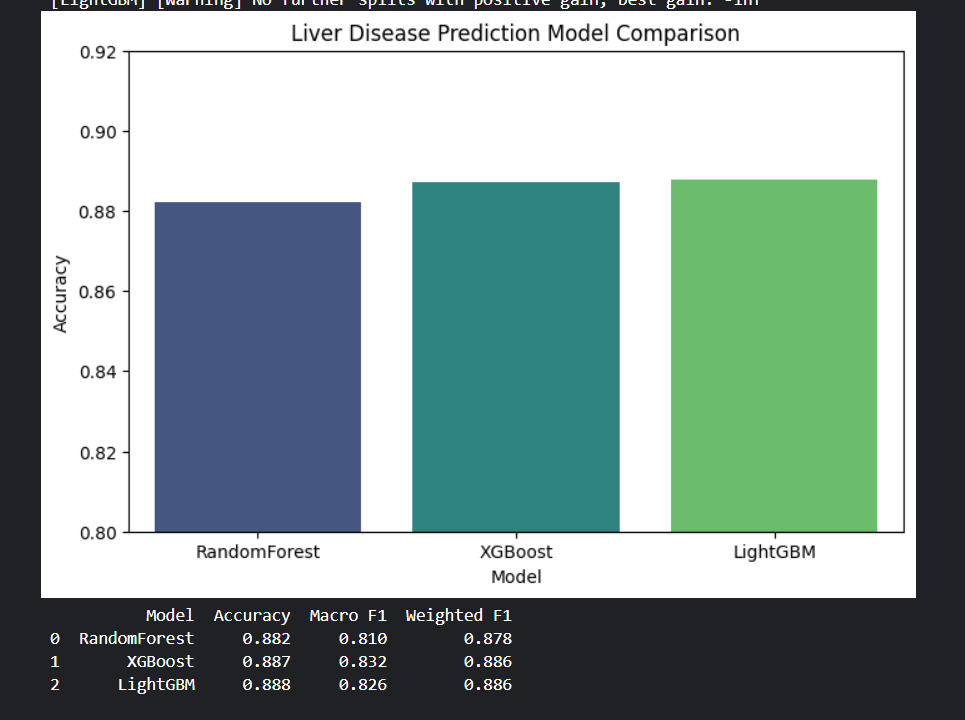